Prediction using Unsupervised ML


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Visualizing the data

In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#Now we will drop the label column because it is an unspuervised learning problem
iris= pd.DataFrame(data)
iris_data = iris.drop(columns= ['Species' ,'Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimum number of clusters

In [10]:
within_cluster_sum_of_square = []
cluster_range = range(1,15)
for i in cluster_range:
  km=KMeans(n_clusters=i)
  km =km.fit(iris_data)
  within_cluster_sum_of_square.append(km.inertia_)

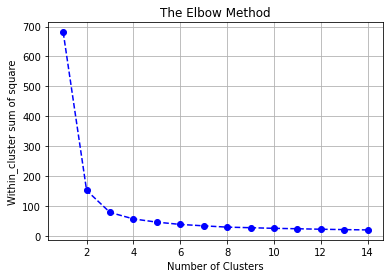

In [12]:
plt.plot(cluster_range,within_cluster_sum_of_square, 'go--',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within_cluster sum of square')
plt.grid()
plt.show()

Applying K Means Clustering on the data

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init ='k-means++',max_iter = 300,n_init = 10,random_state=0)
predictions = model.fit_predict(iris_data)

Visualizing the cluster

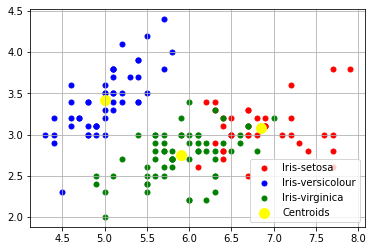

In [16]:
x = iris_data.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0 ,0],x[predictions == 0,1],s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1 ,0],x[predictions == 1,1],s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2 ,0],x[predictions == 2,1],s = 25, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'yellow' , label = 'Centroids')
plt.legend()
plt.grid()
plt.show()